In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('loandata.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data=data.dropna()#dropping missing values

In [7]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


<AxesSubplot:>

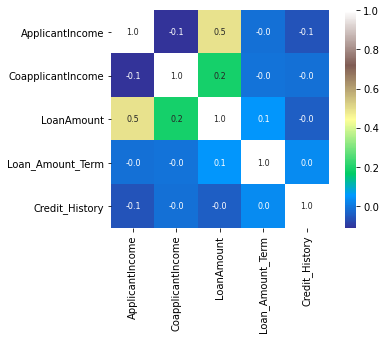

In [9]:
correlation=data.corr()
plt.figure()
sns.heatmap(correlation,cbar=True,square=True,fmt='0.1f',annot=True,annot_kws={'size':8},cmap='terrain')

In [10]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [11]:
#Graphical Analysis

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


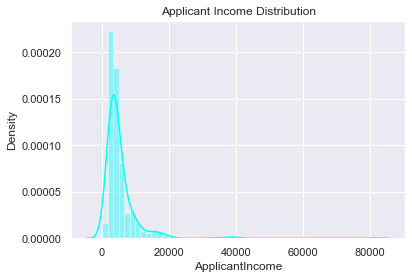

In [12]:
sns.set()
plt.figure()
sns.distplot(data.ApplicantIncome,color='cyan')
plt.title('Applicant Income Distribution')
plt.show()

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


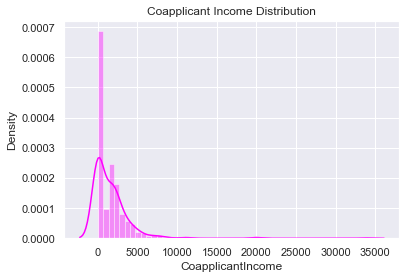

In [13]:
plt.figure()
sns.distplot(data.CoapplicantIncome,color='magenta')
plt.title('Coapplicant Income Distribution')
plt.show()

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


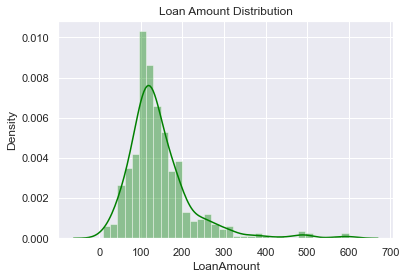

In [14]:
plt.figure()
sns.distplot(data.LoanAmount,color='green')
plt.title('Loan Amount Distribution')
plt.show()

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


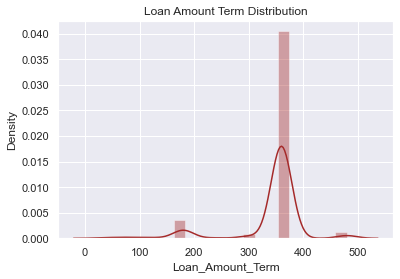

In [15]:
plt.figure()
sns.distplot(data.Loan_Amount_Term,color='brown')
plt.title('Loan Amount Term Distribution')
plt.show()

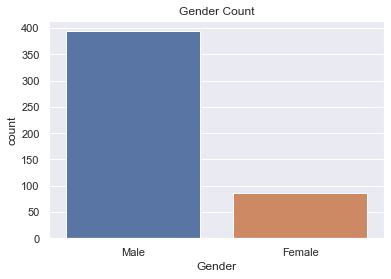

In [16]:
plt.figure()
sns.countplot(x='Gender',data=data)
plt.title('Gender Count')
plt.show()

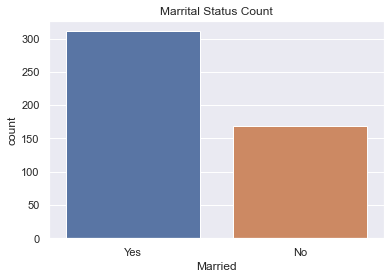

In [17]:
plt.figure()
sns.countplot(x='Married',data=data)
plt.title('Marrital Status Count')
plt.show()

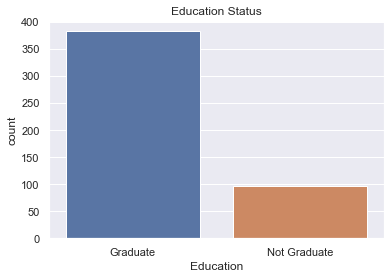

In [18]:
plt.figure()
sns.countplot(x='Education',data=data)
plt.title('Education Status')
plt.show()

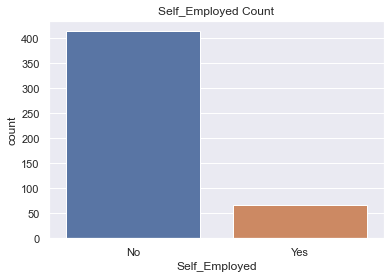

In [19]:
plt.figure()
sns.countplot(x='Self_Employed',data=data)
plt.title('Self_Employed Count')
plt.show()

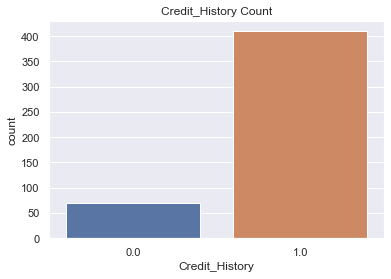

In [20]:
plt.figure()
sns.countplot(x='Credit_History',data=data)
plt.title('Credit_History Count')
plt.show()

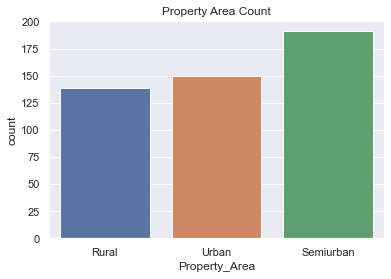

In [21]:
plt.figure()
sns.countplot(x='Property_Area',data=data)
plt.title('Property Area Count')
plt.show()

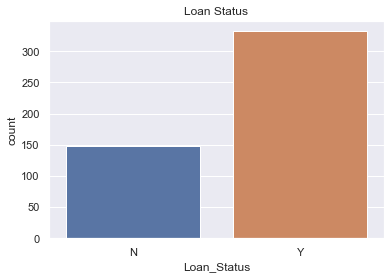

In [22]:
plt.figure()
sns.countplot(x='Loan_Status',data=data)
plt.title('Loan Status')
plt.show()

In [23]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Married', ylabel='count'>

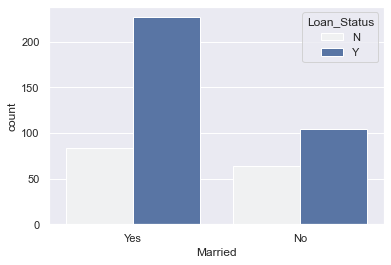

In [24]:
sns.countplot(x='Married',hue='Loan_Status',data=data,color='b')

<AxesSubplot:xlabel='Education', ylabel='count'>

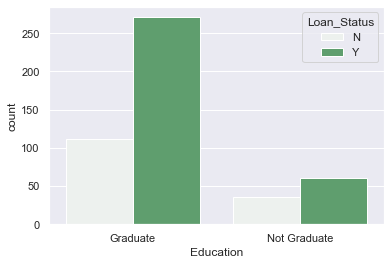

In [25]:
sns.countplot(x='Education',hue='Loan_Status',data=data,color='g')

<AxesSubplot:xlabel='Gender', ylabel='count'>

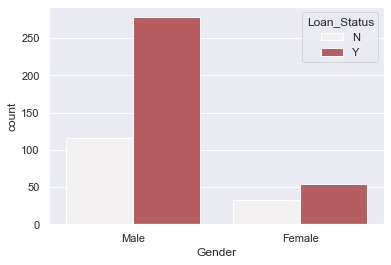

In [26]:
sns.countplot(x='Gender',hue='Loan_Status',data=data,color='r')

In [27]:
data.replace({'Gender':{'Male':0,'Female':1}},inplace=True)
data.replace({'Married':{'Yes':0,'No':1}},inplace=True)
data.replace({'Education':{'Graduate':0,'Not Graduate':1}},inplace=True)
data.replace({'Self_Employed':{'Yes':0,'No':1}},inplace=True)
data.replace({'Property_Area':{'Semiurban':0,'Urban':1,'Rural':2}},inplace=True)
data.replace({'Loan_Status':{'Y':0,'N':1}},inplace=True)

In [28]:
data.Loan_Status.value_counts()

0    332
1    148
Name: Loan_Status, dtype: int64

In [29]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,2,1
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,1,0
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,1,0
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,1,0
5,LP001011,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,1,0


In [30]:
data.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [31]:
data.replace({'Dependents':{'3+':4}},inplace=True)

In [32]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,2,1
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,1,0
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,1,0


In [33]:
data.Dependents.value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [34]:
X=data.drop(['Loan_ID','Loan_Status'],axis=1)
Y=data['Loan_Status']

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [36]:
model=svm.SVC(kernel='linear')

In [37]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [38]:
predictedTrain=model.predict(X_train)
trainingAccuracyScore=accuracy_score(predictedTrain,Y_train)
print("Training Accuracy Score: ",trainingAccuracyScore)

predictedTest=model.predict(X_test)
testingAccuracyScore=accuracy_score(predictedTest,Y_test)
print("Testing Accuracy Score: ",testingAccuracyScore)

Training Accuracy Score:  0.765625
Testing Accuracy Score:  0.78125


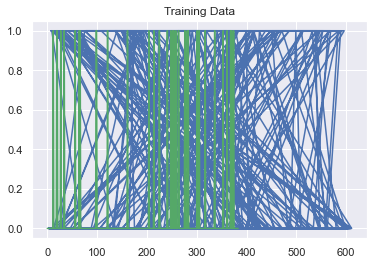

In [39]:
plt.plot(Y_train,color='b',label='Actual Price')
plt.plot(predictedTrain,color='g',label='Predicted Price')
plt.title('Training Data')
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictedTest)
cm

array([[64,  2],
       [19, 11]], dtype=int64)

Text(39.5, 0.5, 'Truth')

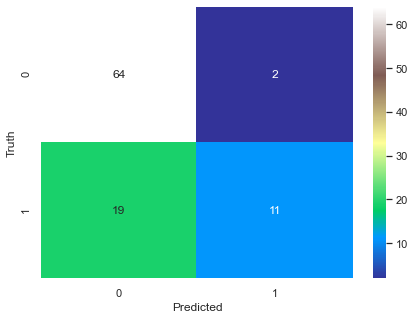

In [42]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True,cmap='terrain')
plt.xlabel('Predicted')
plt.ylabel('Truth')